# Capstone Project 2- Group 6

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
data = pd.read_csv('mldata.csv')
data.head()

,Province,Year,AgeGroup_0_14,AgeGroup_15_29,AgeGroup_30_44,AgeGroup_45_59,AgeGroup_60_74,AgeGroup_75_plus,Age not stated,Female_Value,...,Sales and Services Supervisors,Scientists and Engineers,Senior Management,Technologists and Technicians,Transportation and Natural Resources Management,Vacancy Rate,Average HPI,Inflation Rate,Mortgage Rate,Population
0,Alberta,2016,11085,13755,18320,3930,1880,280,0,25440,...,410,165,55,630,35,2.6,98.64,1.4,3.7,2117940
1,Alberta,2017,7460,12825,14905,3970,2495,465,0,22250,...,565,145,45,445,25,2.2,102.16,1.6,3.8,2119770
2,Alberta,2018,7000,13885,14605,3450,2625,440,0,21810,...,855,125,70,450,20,1.5,103.22,2.3,4.3,2115995
3,Alberta,2019,7435,14535,14465,3410,3300,565,0,22570,...,1065,90,45,340,20,1.0,103.15,1.9,4.2,2112404
4,Alberta,2020,3795,7570,8010,1815,1560,225,0,11880,...,605,70,45,215,15,1.7,105.30,0.7,3.7,2108894


In [3]:
data['Province'] = data['Province'].str.strip()

In [4]:
data.shape

(72, 54)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 54 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Province                                            72 non-null     object 
 1   Year                                                72 non-null     int64  
 2   AgeGroup_0_14                                       72 non-null     int64  
 3   AgeGroup_15_29                                      72 non-null     int64  
 4   AgeGroup_30_44                                      72 non-null     int64  
 5   AgeGroup_45_59                                      72 non-null     int64  
 6   AgeGroup_60_74                                      72 non-null     int64  
 7   AgeGroup_75_plus                                    72 non-null     int64  
 8   Age not stated                                      72 non-null     int64  
 9   F

In [6]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
#data['Year']

In [7]:
data.describe()

,AgeGroup_0_14,AgeGroup_15_29,AgeGroup_30_44,AgeGroup_45_59,AgeGroup_60_74,AgeGroup_75_plus,Age not stated,Female_Value,Male_Value,Business_Immigration,...,Sales and Services Supervisors,Scientists and Engineers,Senior Management,Technologists and Technicians,Transportation and Natural Resources Management,Vacancy Rate,Average HPI,Inflation Rate,Mortgage Rate,Population
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,7.200000e+01
mean,6625.833333,12254.097222,13285.138889,2976.875000,1768.680556,353.819444,0.0,18781.041667,18482.708333,540.000000,...,381.041667,233.680556,95.555556,382.361111,24.722222,3.467382,109.818750,2.712500,4.225000,1.324433e+07
std,7058.822220,16980.586602,15649.383171,3452.679143,2489.669783,548.651672,0.0,22811.112006,22602.758197,1303.801052,...,444.820693,317.314871,152.905097,696.802543,28.653944,2.205708,10.011145,1.808738,0.826966,1.641278e+07
min,175.000000,255.000000,365.000000,65.000000,25.000000,0.000000,0.0,440.000000,455.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,98.640000,0.700000,3.200000,1.530540e+05
25%,1712.500000,1953.750000,2711.250000,515.000000,105.000000,18.750000,0.0,3491.250000,3582.500000,5.000000,...,83.750000,80.000000,3.750000,23.750000,0.000000,1.797250,102.902500,1.550000,3.700000,3.060932e+06
50%,4172.500000,6005.000000,6635.000000,1350.000000,587.500000,80.000000,0.0,9975.000000,10235.000000,20.000000,...,235.000000,125.000000,15.000000,222.500000,17.500000,2.700000,104.260000,2.100000,4.000000,4.671242e+06
75%,9042.500000,14381.250000,18263.750000,4152.500000,2487.500000,461.250000,0.0,25327.500000,24498.750000,298.750000,...,561.250000,215.000000,136.250000,393.750000,35.000000,4.700000,118.330000,3.450000,4.450000,1.903141e+07
max,30015.000000,90240.000000,64795.000000,14700.000000,11240.000000,2405.000000,0.0,96940.000000,103360.000000,5860.000000,...,2095.000000,1360.000000,805.000000,5145.000000,100.000000,8.500000,125.100000,6.800000,6.000000,6.047462e+07


In [8]:
data.columns

Index(['Province', 'Year', 'AgeGroup_0_14', 'AgeGroup_15_29', 'AgeGroup_30_44',
       'AgeGroup_45_59', 'AgeGroup_60_74', 'AgeGroup_75_plus',
       'Age not stated', 'Female_Value', 'Male_Value', 'Business_Immigration',
       'Protected_Person_in_Canada', 'Provincial_Nominee_Program',
       'Resettled_Refugee', 'Sponsored_Family_Immigration',
       'Temp_Resident_to_Permanent_Resident', 'Worker_Program',
       'Administrative and Support Services',
       'Art, Culture, and Media Professionals',
       'Business and Financial Managers', 'Child and Home Care Services',
       'Cleaning and Maintenance', 'Construction and Equipment Operations',
       'Construction and Facility Management',
       'Customer Service and Support Occupations',
       'Customer Services and Personal Services Management',
       'Education and Teaching Professionals',
       'Financial and Business Professionals', 'Food Service and Hospitality',
       'Health and Social Services Managers',
       'Heal

### Feature Selection

In [9]:
numeric_data = data.select_dtypes(include=['int', 'float'])

# Separating features and target variable
X = numeric_data.drop(columns=['Average HPI'])  # Features
y = numeric_data['Average HPI']  # Target variable

# Initialize RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index=X.columns,
                                   columns=['Importance']).sort_values('Importance', ascending=False)

# Print feature importances
print(feature_importances)

                                                      Importance
Inflation Rate                                      9.134928e-01
Temp_Resident_to_Permanent_Resident                 4.542665e-02
Mortgage Rate                                       3.710765e-02
Cleaning and Maintenance                            9.711875e-04
Resettled_Refugee                                   9.690146e-04
Population                                          6.942510e-04
Education and Teaching Professionals                2.904298e-04
Construction and Equipment Operations               2.389900e-04
Paralegals and Social Service Workers               1.845765e-04
Business_Immigration                                1.136134e-04
Provincial_Nominee_Program                          7.831532e-05
Customer Service and Support Occupations            5.936960e-05
Manufacturing Management                            5.820556e-05
Protected_Person_in_Canada                          5.127681e-05
Sponsored_Family_Immigrat

In [10]:
top_15_features = feature_importances.head(15)
print(top_15_features)

                                          Importance
Inflation Rate                              0.913493
Temp_Resident_to_Permanent_Resident         0.045427
Mortgage Rate                               0.037108
Cleaning and Maintenance                    0.000971
Resettled_Refugee                           0.000969
Population                                  0.000694
Education and Teaching Professionals        0.000290
Construction and Equipment Operations       0.000239
Paralegals and Social Service Workers       0.000185
Business_Immigration                        0.000114
Provincial_Nominee_Program                  0.000078
Customer Service and Support Occupations    0.000059
Manufacturing Management                    0.000058
Protected_Person_in_Canada                  0.000051
Sponsored_Family_Immigration                0.000048


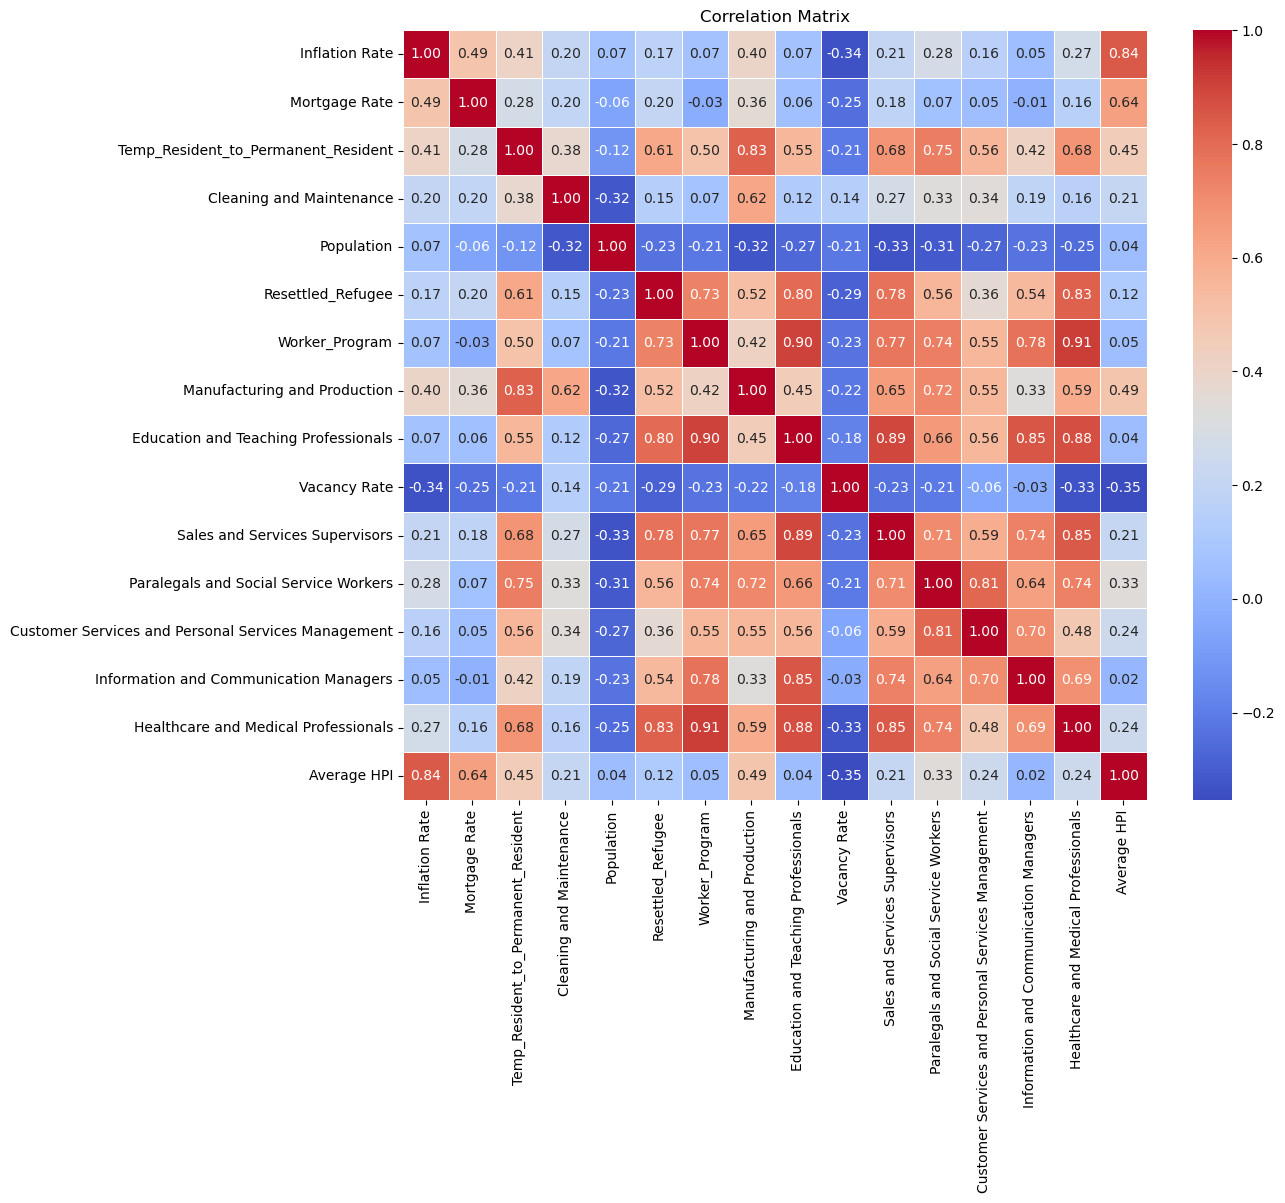

In [12]:
columns = ['Province','Inflation Rate', 'Mortgage Rate', 'Temp_Resident_to_Permanent_Resident',
           'Cleaning and Maintenance', 'Population', 'Resettled_Refugee', 'Worker_Program',
           'Manufacturing and Production', 'Education and Teaching Professionals', 
           'Vacancy Rate', 'Sales and Services Supervisors', 
           'Paralegals and Social Service Workers', 
           'Customer Services and Personal Services Management',
           'Information and Communication Managers', 
           'Healthcare and Medical Professionals', 'Average HPI']

# Selecting only the specified columns
data_selected = data[columns]

# Calculate the correlation matrix
correlation_matrix = data_selected.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


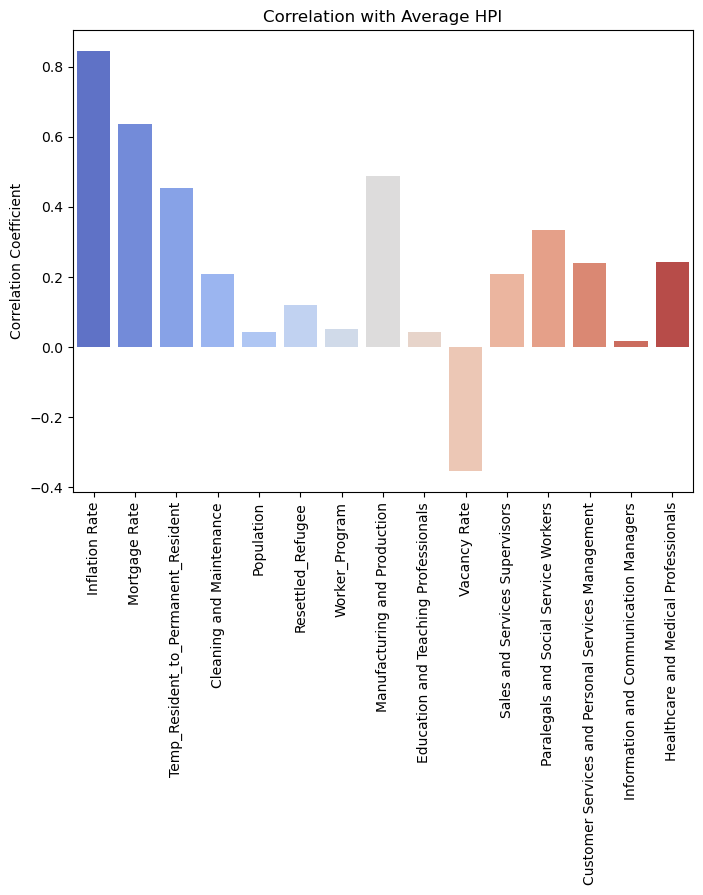

In [13]:
# Get the correlation of 'Average HPI' with other columns
hpi_correlation = correlation_matrix['Average HPI'].drop('Average HPI')

# Plotting the correlation with 'Average HPI'
plt.figure(figsize=(8, 6))
sns.barplot(x=hpi_correlation.index, y=hpi_correlation.values, palette='coolwarm')
plt.title('Correlation with Average HPI')
plt.xticks(rotation=90)
plt.ylabel('Correlation Coefficient')
plt.show()


### Prediction Models without Covid Marker

#### HPI prediction for Canada

In [17]:
# Selecting features and target
selected_columns = ['Province','Inflation Rate', 'Mortgage Rate', 'Temp_Resident_to_Permanent_Resident',
                    'Cleaning and Maintenance', 'Population', 'Resettled_Refugee', 'Worker_Program',
                    'Manufacturing and Production', 'Education and Teaching Professionals', 
                    'Vacancy Rate', 'Sales and Services Supervisors', 
                    'Paralegals and Social Service Workers', 
                    'Customer Services and Personal Services Management',
                    'Information and Communication Managers', 
                    'Healthcare and Medical Professionals']

# Selecting only the specified columns as features
X = data[selected_columns]

In [ ]:
y = data['Average HPI']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [20]:
print(X_train.shape)
print(X_test.shape)

(57, 16)
(15, 16)


##### Linear Regression

In [21]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Province']),
                                      remainder = 'passthrough')
scaler = StandardScaler()
lr = LinearRegression()
pipe = make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)
y_pred_lr = pipe.predict(X_test)
r2_score(y_test,y_pred_lr)

0.6406395876929387

##### Lasso Regression

In [22]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Province']),
                                      remainder = 'passthrough')
scaler = StandardScaler()
lasso = Lasso()
pipe = make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)
y_pred_lasso =pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.7473203279105495

##### Ridge Regression

In [23]:
ridge = Ridge()
pipe = make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred_ridge =pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.707797568419304

##### Compariosn among three

In [24]:
print("No Regularization: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.6406395876929387
Lasso:  0.7473203279105495
Ridge:  0.707797568419304


#### HPI prediction for provinces

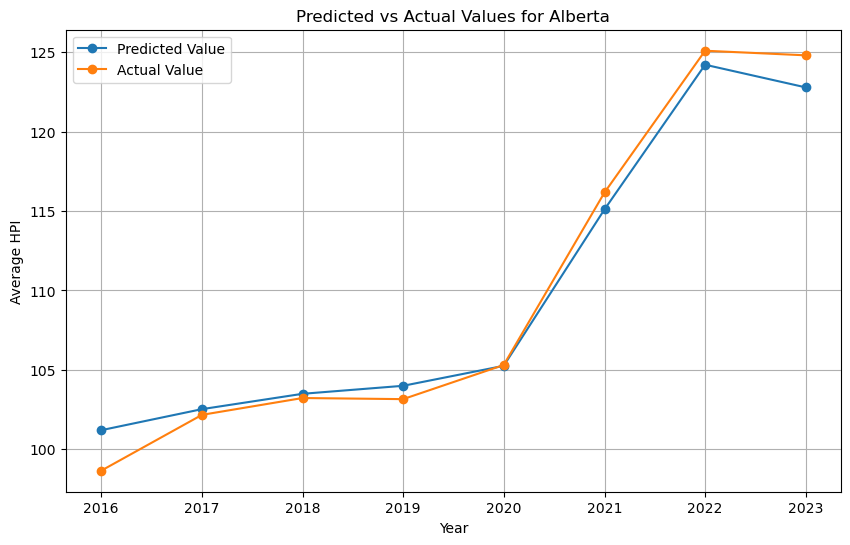

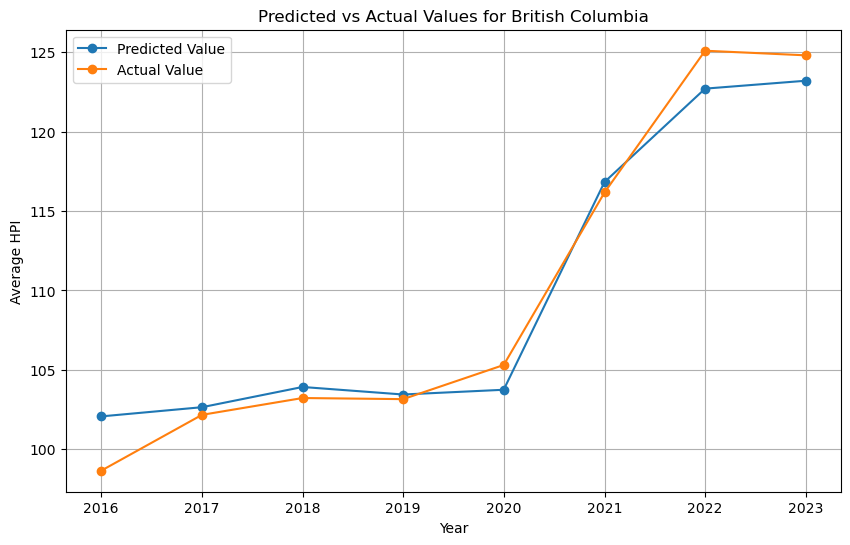

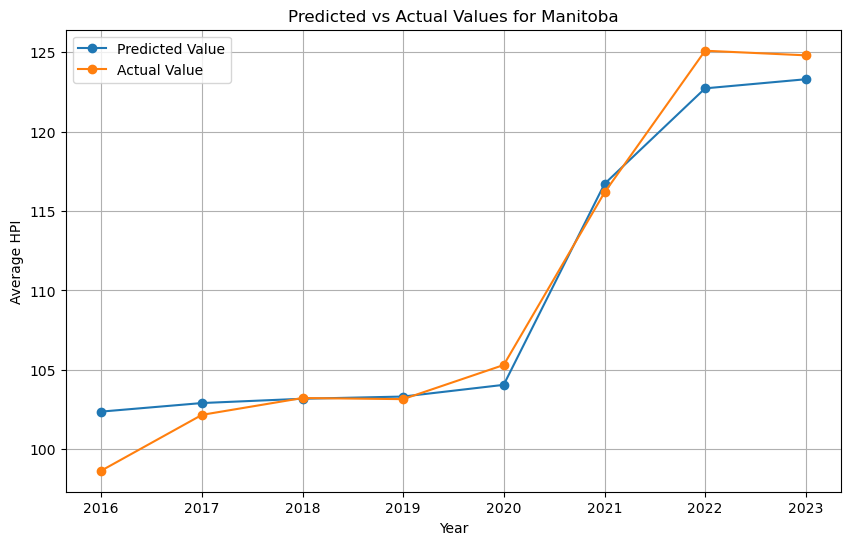

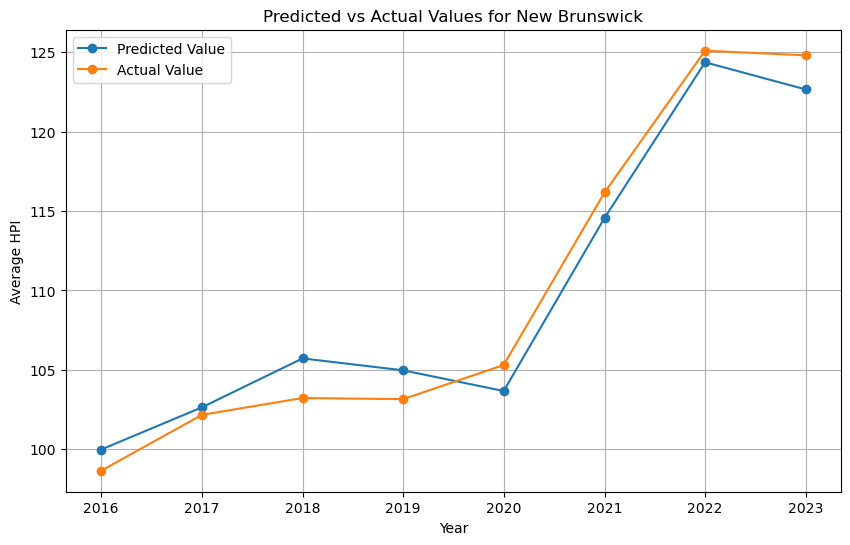

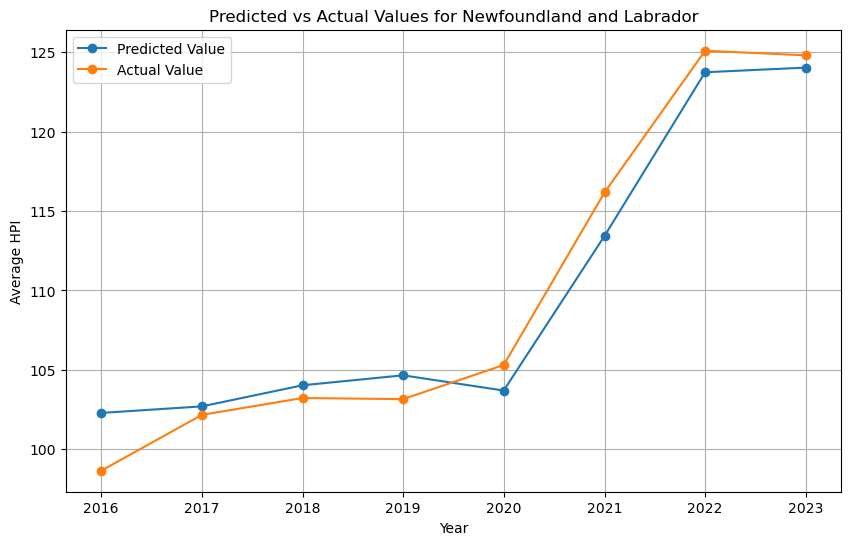

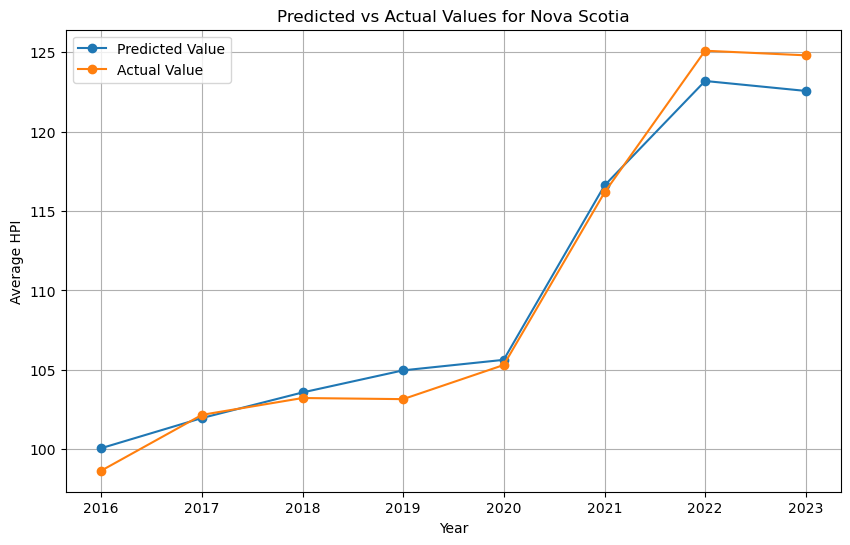

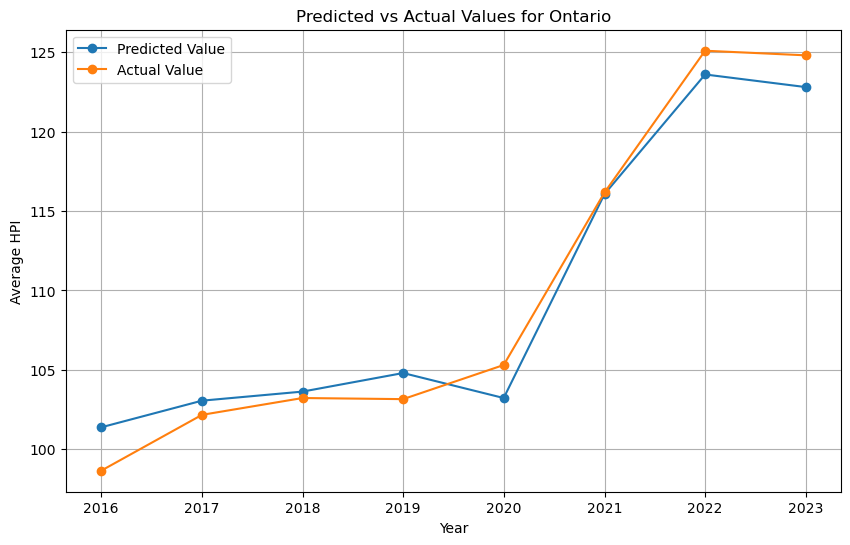

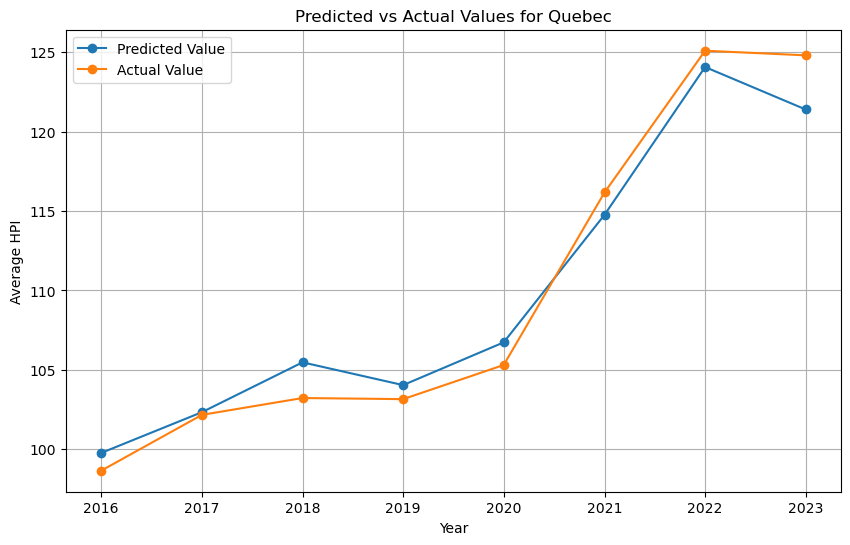

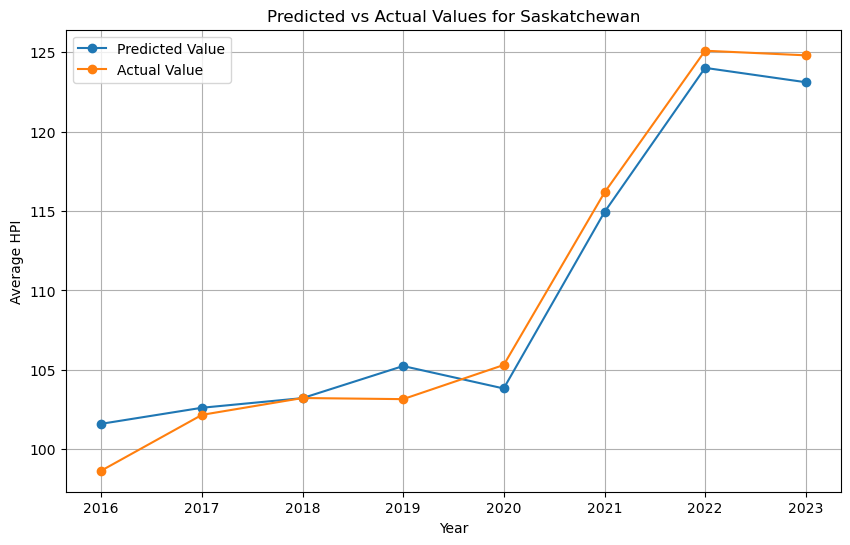

R^2 score for Alberta: 0.9830458705686826
R^2 score for British Columbia: 0.9700943034535696
R^2 score for Manitoba: 0.9693917177611243
R^2 score for New Brunswick: 0.9722559367506577
R^2 score for Newfoundland and Labrador: 0.9633766868329311
R^2 score for Nova Scotia: 0.9817565830447651
R^2 score for Ontario: 0.9725394945052362
R^2 score for Quebec: 0.9698679868547441
R^2 score for Saskatchewan: 0.97342736597311


In [43]:
import matplotlib.pyplot as plt

def predict_province(df, province_name=None):
    """
    Predicts the target variable for specific provinces or all provinces using Lasso regression.
    
    Parameters:
        df (DataFrame): The dataframe containing the data.
        province_name (str or None): The name of the province for which to make predictions.
            If None, predictions will be made for all provinces.
    
    Returns:
        dict: A dictionary containing predicted values, actual values, R^2 scores, and years for each province.
            Keys are province names.
            Values are tuples (y_pred, y_actual, r2, years).
    """
    # Selecting features and target
    selected_columns = ['Inflation Rate', 'Mortgage Rate', 'Temp_Resident_to_Permanent_Resident',
                        'Cleaning and Maintenance', 'Population', 'Resettled_Refugee', 'Worker_Program',
                        'Manufacturing and Production', 'Education and Teaching Professionals', 
                        'Vacancy Rate', 'Sales and Services Supervisors', 
                        'Paralegals and Social Service Workers', 
                        'Customer Services and Personal Services Management',
                        'Information and Communication Managers', 
                        'Healthcare and Medical Professionals']
    
    if province_name:
        # Selecting data for the specified province
        df_province = df[df['Province'] == province_name]
        
        # Check if there are samples for the specified province
        if df_province.empty:
            print(f"No data available for {province_name}.")
            return None
    else:
        # Use all provinces
        df_province = df.copy()
    
    # Grouping data by province
    province_groups = df_province.groupby('Province')
    
    results = {}
    
    for province, df_group in province_groups:
        X_province = df_group[selected_columns]
        y_province = df_group['Average HPI']
        
        # Creating a pipeline
        scaler = StandardScaler()
        lasso = Lasso()
        pipe = make_pipeline(scaler, lasso)
        
        # Fitting the model
        pipe.fit(X_province, y_province)
        
        # Making predictions
        y_pred = pipe.predict(X_province)
        
        # Calculating R^2 score
        r2 = r2_score(y_province, y_pred)
        
        # Collecting years
        years = df_group['Year']
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(years, y_pred, label='Predicted Value', marker='o')
        plt.plot(years, y_actual, label='Actual Value', marker='o')
        plt.title(f"Predicted vs Actual Values for {province}")
        plt.xlabel("Year")
        plt.ylabel("Average HPI")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        results[province] = (y_pred, y_province.values, r2, years)
    
    return results

# Call the function to get predictions
results = predict_province(data)

# Print the results
for province_name, (y_pred, y_actual, r2, years) in results.items():
    print(f"R^2 score for {province_name}: {r2}")


### Prediction Models with Covid Marker

In [51]:
covid_data = pd.read_csv('mldata.csv')
covid_data['Province'] = covid_data['Province'].str.strip()
covid_data['Covid_Marker'] = (covid_data['Year'] > 2019).astype(int)
covid_data['Year'] = pd.to_datetime(covid_data['Year'], format='%Y')

In [52]:
covid_data.head()

,Province,Year,AgeGroup_0_14,AgeGroup_15_29,AgeGroup_30_44,AgeGroup_45_59,AgeGroup_60_74,AgeGroup_75_plus,Age not stated,Female_Value,...,Scientists and Engineers,Senior Management,Technologists and Technicians,Transportation and Natural Resources Management,Vacancy Rate,Average HPI,Inflation Rate,Mortgage Rate,Population,Covid_Marker
0,Alberta,2016-01-01,11085,13755,18320,3930,1880,280,0,25440,...,165,55,630,35,2.6,98.64,1.4,3.7,2117940,0
1,Alberta,2017-01-01,7460,12825,14905,3970,2495,465,0,22250,...,145,45,445,25,2.2,102.16,1.6,3.8,2119770,0
2,Alberta,2018-01-01,7000,13885,14605,3450,2625,440,0,21810,...,125,70,450,20,1.5,103.22,2.3,4.3,2115995,0
3,Alberta,2019-01-01,7435,14535,14465,3410,3300,565,0,22570,...,90,45,340,20,1.0,103.15,1.9,4.2,2112404,0
4,Alberta,2020-01-01,3795,7570,8010,1815,1560,225,0,11880,...,70,45,215,15,1.7,105.30,0.7,3.7,2108894,1


#### HPI prediction for Canada

In [53]:
# Selecting features and target
selected_columns = ['Province','Inflation Rate', 'Mortgage Rate', 'Temp_Resident_to_Permanent_Resident',
                    'Cleaning and Maintenance', 'Population', 'Resettled_Refugee', 'Worker_Program',
                    'Manufacturing and Production', 'Education and Teaching Professionals', 
                    'Vacancy Rate', 'Sales and Services Supervisors', 
                    'Paralegals and Social Service Workers', 
                    'Customer Services and Personal Services Management',
                    'Information and Communication Managers', 
                    'Healthcare and Medical Professionals','Covid_Marker']

# Selecting only the specified columns as features
X = covid_data[selected_columns]
y = covid_data['Average HPI']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

column_trans = make_column_transformer((OneHotEncoder(sparse=False),['Province']),
                                      remainder = 'passthrough')
scaler = StandardScaler()


lasso = Lasso()
pipe = make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)
y_pred_lasso =pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)


0.9419777628601775

#### HPI prediction for provinces

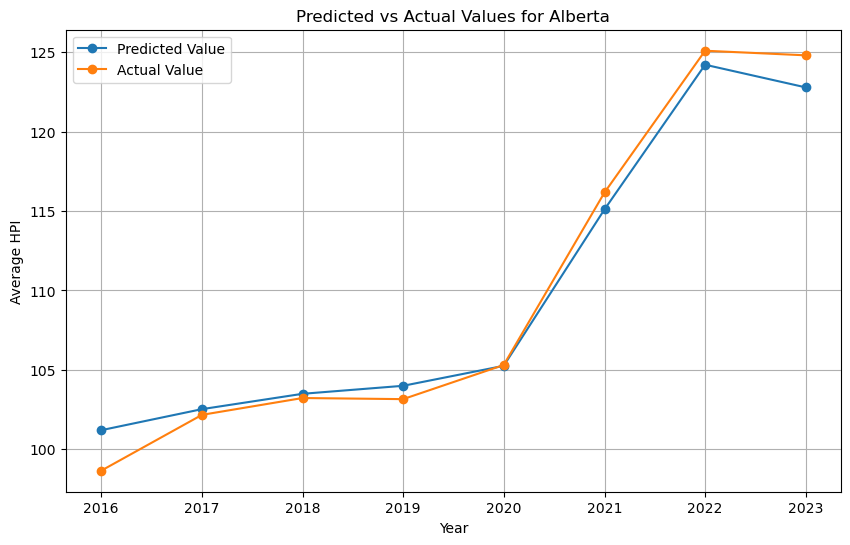

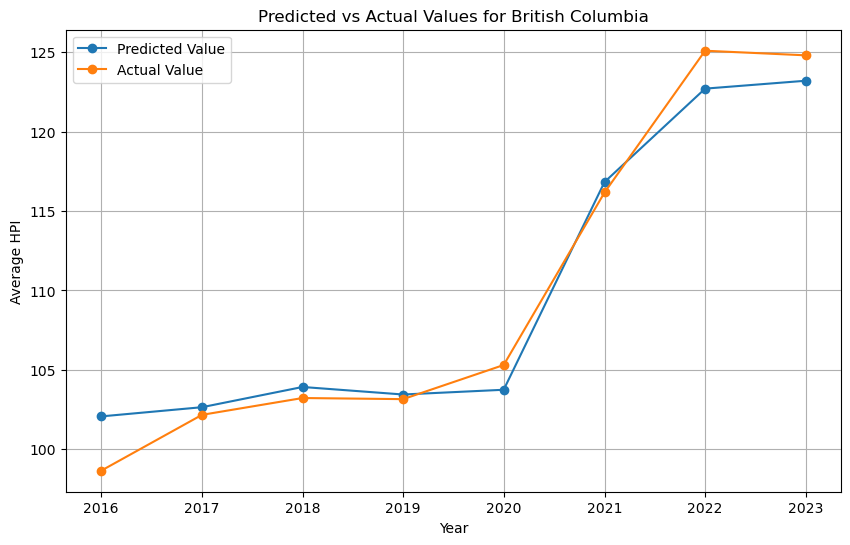

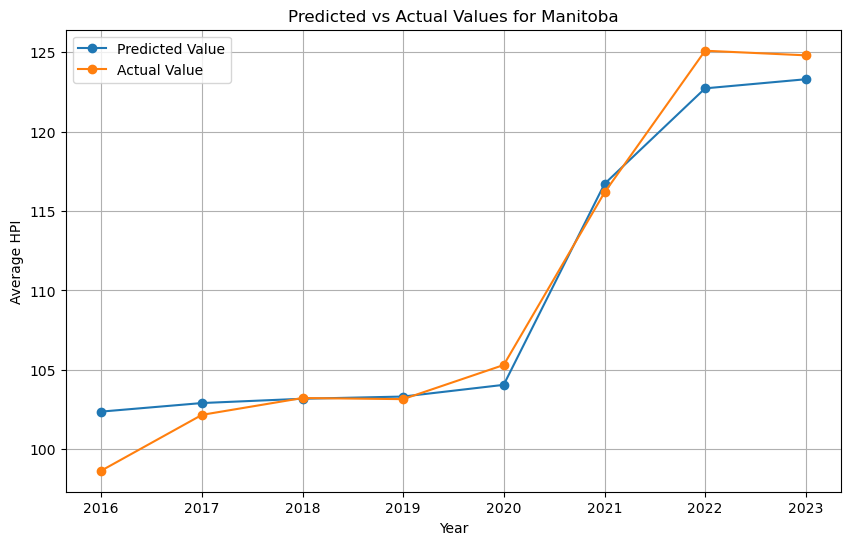

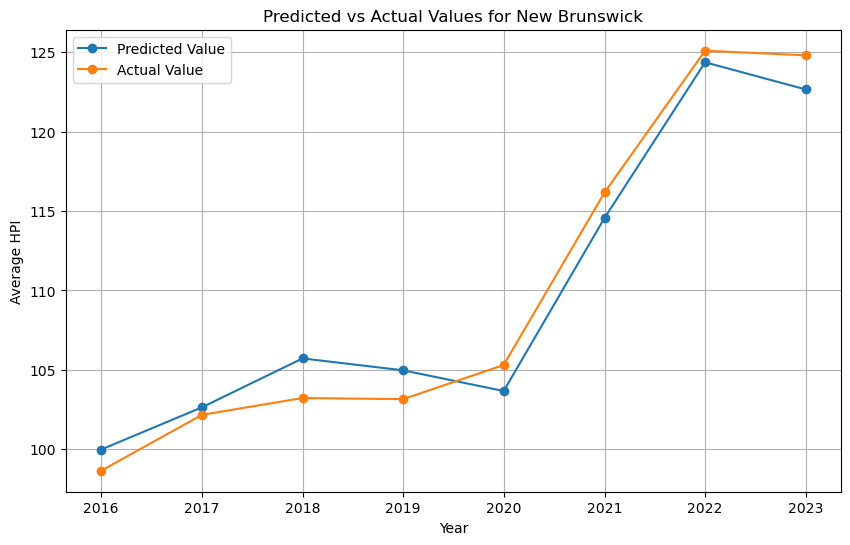

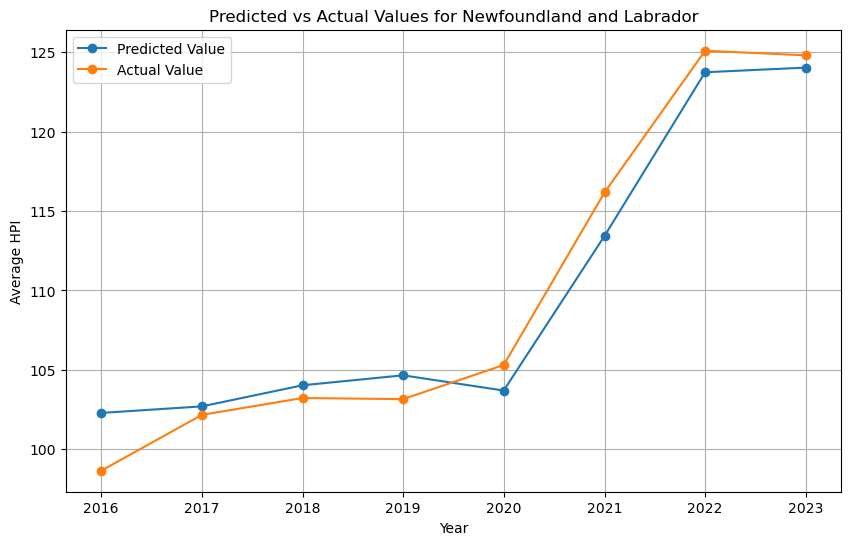

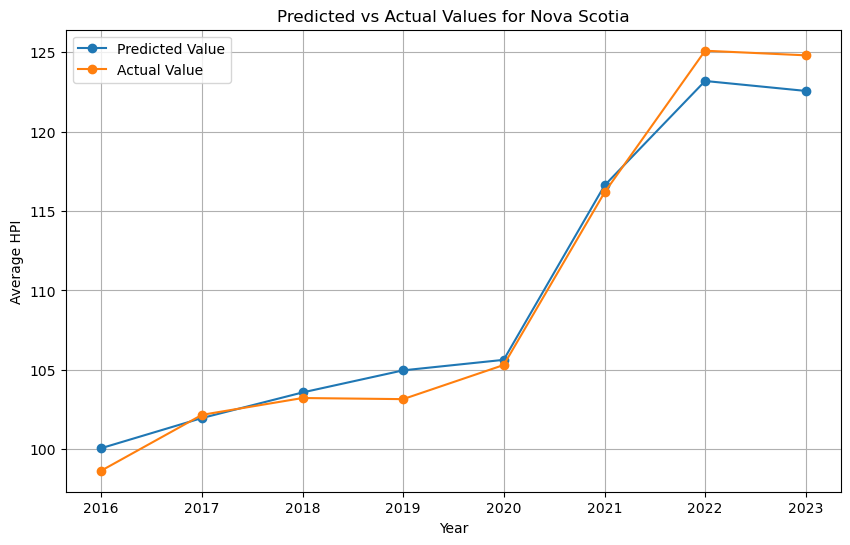

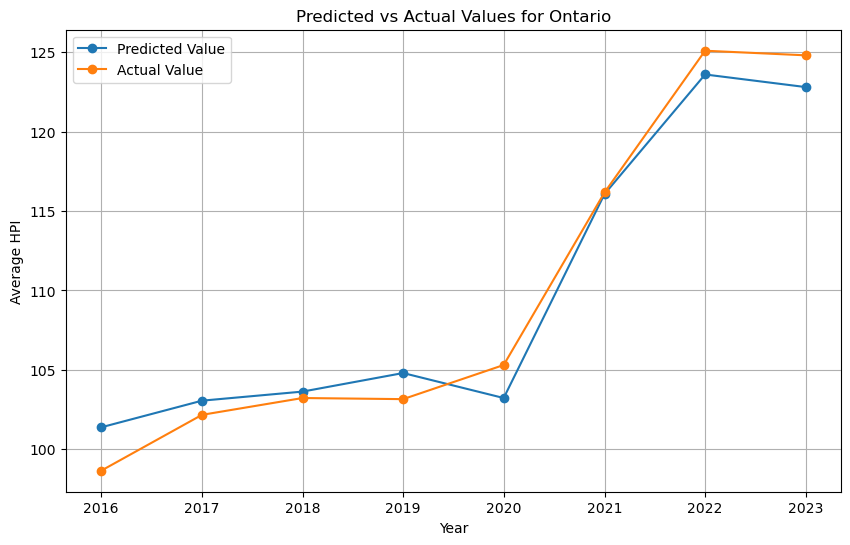

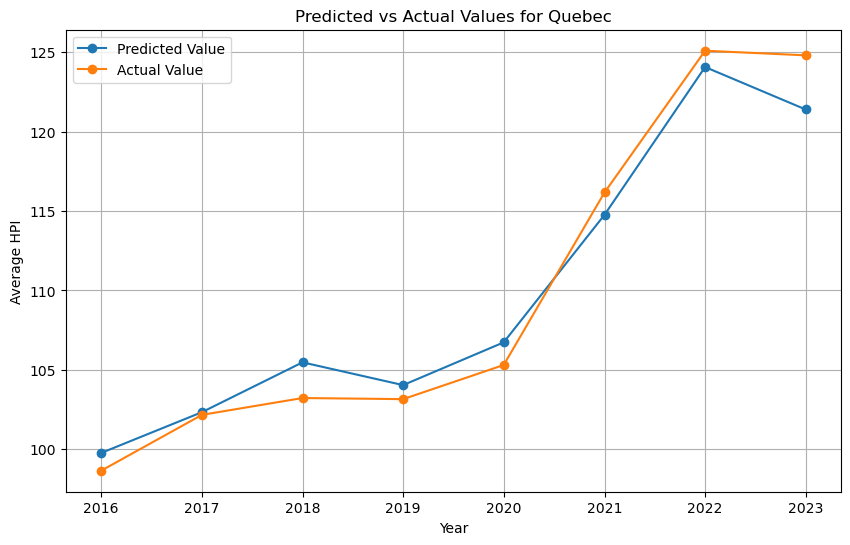

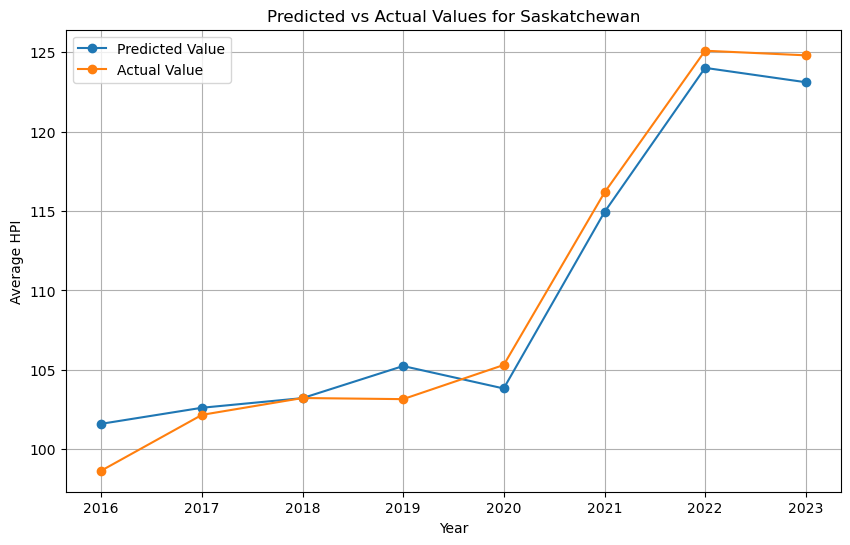

R^2 score for Alberta: 0.9830458705686826
R^2 score for British Columbia: 0.9700943034535696
R^2 score for Manitoba: 0.9693917177611243
R^2 score for New Brunswick: 0.9722559367506577
R^2 score for Newfoundland and Labrador: 0.9633766868329311
R^2 score for Nova Scotia: 0.9817565830447651
R^2 score for Ontario: 0.9725394945052362
R^2 score for Quebec: 0.9698679868547441
R^2 score for Saskatchewan: 0.97342736597311


In [54]:
import matplotlib.pyplot as plt

def predict_province(df, province_name=None):
    """
    Predicts the target variable for specific provinces or all provinces using Lasso regression.
    
    Parameters:
        df (DataFrame): The dataframe containing the data.
        province_name (str or None): The name of the province for which to make predictions.
            If None, predictions will be made for all provinces.
    
    Returns:
        dict: A dictionary containing predicted values, actual values, R^2 scores, and years for each province.
            Keys are province names.
            Values are tuples (y_pred, y_actual, r2, years).
    """
    # Selecting features and target
    selected_columns = ['Inflation Rate', 'Mortgage Rate', 'Temp_Resident_to_Permanent_Resident',
                        'Cleaning and Maintenance', 'Population', 'Resettled_Refugee', 'Worker_Program',
                        'Manufacturing and Production', 'Education and Teaching Professionals', 
                        'Vacancy Rate', 'Sales and Services Supervisors', 
                        'Paralegals and Social Service Workers', 
                        'Customer Services and Personal Services Management',
                        'Information and Communication Managers', 
                        'Healthcare and Medical Professionals']
    
    if province_name:
        # Selecting data for the specified province
        df_province = df[df['Province'] == province_name]
        
        # Check if there are samples for the specified province
        if df_province.empty:
            print(f"No data available for {province_name}.")
            return None
    else:
        # Use all provinces
        df_province = df.copy()
    
    # Grouping data by province
    province_groups = df_province.groupby('Province')
    
    results = {}
    
    for province, df_group in province_groups:
        X_province = df_group[selected_columns]
        y_province = df_group['Average HPI']
        
        # Creating a pipeline
        scaler = StandardScaler()
        lasso = Lasso()
        pipe = make_pipeline(scaler, lasso)
        
        # Fitting the model
        pipe.fit(X_province, y_province)
        
        # Making predictions
        y_pred = pipe.predict(X_province)
        
        # Calculating R^2 score
        r2 = r2_score(y_province, y_pred)
        
        # Collecting years
        years = df_group['Year']
        
        # Plotting
        plt.figure(figsize=(10, 6))
        plt.plot(years, y_pred, label='Predicted Value', marker='o')
        plt.plot(years, y_actual, label='Actual Value', marker='o')
        plt.title(f"Predicted vs Actual Values for {province}")
        plt.xlabel("Year")
        plt.ylabel("Average HPI")
        plt.legend()
        plt.grid(True)
        plt.show()
        
        results[province] = (y_pred, y_province.values, r2, years)
    
    return results

# Call the function to get predictions
results = predict_province(covid_data)

# Print the results
for province_name, (y_pred, y_actual, r2, years) in results.items():
    print(f"R^2 score for {province_name}: {r2}")
